<a href="https://colab.research.google.com/github/nurikarahmadani/healthkathon-bpjs/blob/main/sehathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install range_key_dict
!pip install -U imbalanced-learn
!pip install scikit-learn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 4.8 MB/s 
     |████████████████████████████████| 199 kB 58.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.0 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Data Collection

df_bpjs = pd.read_csv('/content/drive/MyDrive/sampling_healtkathon2022.csv')
df_diagnose = pd.read_csv('/content/drive/MyDrive/Salinan sampling_healthkathon2022_diagnosa.csv')  
df_procedure = pd.read_csv('/content/drive/MyDrive/sampling_healthkathon2022_procedure.csv')
# df_predict = pd.read_csv('/content/drive/MyDrive/Salinan merged1.csv')


In [5]:
# df_bpjs_tot = df_bpjs

## Data Prep (Check Data Quality)

1.  Check duplicate

In [6]:
df_bpjs["id"].value_counts()

3966586     4
8603080     2
3481090     2
10749999    2
11146119    2
           ..
984996      1
8658768     1
6481061     1
6109477     1
102794      1
Name: id, Length: 11401868, dtype: int64

In [7]:
df_bpjs.shape

(11401882, 22)

In [8]:
df_procedure.value_counts()

id        proc 
3966586   67.61    4
          99.04    4
          86.22    4
10749999  99.18    2
10608307  93.96    2
                  ..
4554211   99.18    1
4554212   39.95    1
4554213   90.59    1
4554215   90.59    1
11426953  23.09    1
Length: 12202824, dtype: int64

In [9]:
df_procedure.shape

(12202871, 2)

In [10]:
df_diagnose.value_counts()

id        diag   levelid
4020415   T81.3  2          4
          O82.9  1          4
3966586   D64.9  2          4
          T81.3  1          4
4020415   O99.0  2          4
                           ..
3976361   L01.0  1          1
3976362   S09.8  1          1
3976363   J45.9  1          1
3976364   J06.9  2          1
11426957  R10.0  1          1
Length: 17308480, dtype: int64

In [11]:
df_diagnose.shape

(17308536, 3)

In [12]:
df_bpjs_dupe = df_bpjs.drop_duplicates()
df_procedure_dupe = df_procedure.drop_duplicates()
df_diagnose_dupe = df_diagnose.drop_duplicates()

In [13]:
print(df_bpjs_dupe.shape)
print(df_procedure_dupe.shape)
print(df_diagnose_dupe.shape)

(11401868, 22)
(12202824, 2)
(17308480, 3)


- The code is imbalanced (11244993:156889)

In [14]:
df_bpjs_dupe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11401868 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   id           11401868 non-null  int64  
 1   id_peserta   11401868 non-null  int64  
 2   dati2        11401868 non-null  int64  
 3   typefaskes   11401868 non-null  object 
 4   usia         11401868 non-null  int64  
 5   jenkel       11401819 non-null  object 
 6   pisat        11401678 non-null  float64
 7   tgldatang    11401868 non-null  object 
 8   tglpulang    11401868 non-null  object 
 9   jenispel     11401868 non-null  int64  
 10  politujuan   7360424 non-null   object 
 11  diagfktp     11399338 non-null  object 
 12  biaya        11344053 non-null  float64
 13  jenispulang  11401829 non-null  float64
 14  cbg          11401868 non-null  object 
 15  kelasrawat   11401868 non-null  int64  
 16  kdsa         11203198 non-null  object 
 17  kdsp         11204861 non

In [15]:
df_bpjs_dupe.describe()

,id,id_peserta,dati2,usia,pisat,jenispel,biaya,jenispulang,kelasrawat,label
count,1.140187e+07,1.140187e+07,1.140187e+07,1.140187e+07,1.140168e+07,1.140187e+07,1.134405e+07,1.140183e+07,1.140187e+07,1.140187e+07
mean,5.712718e+06,4.199294e+06,1.825299e+02,3.705690e+01,2.498204e+00,1.645544e+00,2.146843e+06,1.094596e+00,2.784696e+00,1.375950e-02
std,3.298534e+06,2.436249e+06,1.061352e+02,2.292188e+01,1.390863e+00,4.783481e-01,5.207570e+06,5.131554e-01,5.511468e-01,1.164911e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.855429e+06,2.119460e+06,1.140000e+02,1.800000e+01,1.000000e+00,1.000000e+00,1.904000e+05,1.000000e+00,3.000000e+00,0.000000e+00
50%,5.712226e+06,4.161532e+06,1.590000e+02,3.900000e+01,3.000000e+00,2.000000e+00,2.872000e+05,1.000000e+00,3.000000e+00,0.000000e+00
75%,8.568898e+06,6.292148e+06,2.280000e+02,5.600000e+01,4.000000e+00,2.000000e+00,2.996000e+06,1.000000e+00,3.000000e+00,0.000000e+00
max,1.142696e+07,8.527919e+06,5.280000e+02,1.100000e+02,5.000000e+00,2.000000e+00,4.016966e+08,5.000000e+00,3.000000e+00,1.000000e+00


In [16]:
df_bpjs_dupe.isnull().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041444
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

<img src="./img/header_dataset.png" width="1400">

## 2. Drop Unnecessary Data and Columns

In [17]:
df_bpjs_notnull = df_bpjs_dupe.dropna(thresh=17)

In [18]:
df_bpjs_dupe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11401868 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   id           11401868 non-null  int64  
 1   id_peserta   11401868 non-null  int64  
 2   dati2        11401868 non-null  int64  
 3   typefaskes   11401868 non-null  object 
 4   usia         11401868 non-null  int64  
 5   jenkel       11401819 non-null  object 
 6   pisat        11401678 non-null  float64
 7   tgldatang    11401868 non-null  object 
 8   tglpulang    11401868 non-null  object 
 9   jenispel     11401868 non-null  int64  
 10  politujuan   7360424 non-null   object 
 11  diagfktp     11399338 non-null  object 
 12  biaya        11344053 non-null  float64
 13  jenispulang  11401829 non-null  float64
 14  cbg          11401868 non-null  object 
 15  kelasrawat   11401868 non-null  int64  
 16  kdsa         11203198 non-null  object 
 17  kdsp         11204861 non

In [19]:
# filling jenis kelamin dengan cara random L dan P
from random import choice

mask = df_bpjs_notnull["jenkel"].isna()
df_bpjs_notnull.loc[mask,["jenkel"]] = df_bpjs_notnull.loc[mask,["jenkel"]].applymap(lambda _: choice(["L","P"]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [20]:
df_bpjs_notnull['pisat'].bfill(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['politujuan'].notna()]

In [22]:
# buang politujuan yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['politujuan'].notna()]


In [23]:
# buang diagfktp yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['diagfktp'].notna()]

In [24]:
# buang biaya yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['biaya'].notna()]

In [25]:
# buang jenispulang yang null
df_bpjs_notnull = df_bpjs_notnull[df_bpjs_notnull['jenispulang'].notna()]

In [26]:
df_bpjs_notnull[["kdsa","kdsp","kdsr","kdsi","kdsd"]] = df_bpjs_notnull[["kdsa","kdsp","kdsr","kdsi","kdsd"]].fillna("None")

## Merge dataset

In [27]:
df_bpjs_clean = pd.merge(df_bpjs_notnull, df_diagnose_dupe, how="left", on=["id"])
df_bpjs_clean = pd.merge(df_bpjs_clean, df_procedure_dupe, how="left", on=["id"])

In [28]:
# buang proc yang nilainya null
df_bpjs_clean = df_bpjs_clean[df_bpjs_clean['proc'].notna()]

In [29]:
df_bpjs_clean = df_bpjs_clean[~df_bpjs_clean['diag'].str[0].str.isdigit()]
df_bpjs_clean = df_bpjs_clean[df_bpjs_clean['proc'].str[0].str.isdigit()]

In [30]:
df_bpjs_clean["pisat"].value_counts()

1.0    2996128
3.0    1467932
4.0    1364367
5.0     219069
2.0     160578
Name: pisat, dtype: int64

## 3. Konversi obyek ke numerik

In [31]:
df_bpjs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
 22  diag         object 
 23  levelid      float64
 24  proc         object 
dtypes: float64(4), int64(7), object(14)
memory usage: 1.2+ GB


In [32]:
# labelencoder untuk kolom bertipe kategorikal
labelencoder = LabelEncoder()
df_bpjs_clean["typefaskes"] = labelencoder.fit_transform(df_bpjs_clean["typefaskes"])
df_bpjs_clean["jenkel"] = labelencoder.fit_transform(df_bpjs_clean["jenkel"])
df_bpjs_clean["politujuan"] = labelencoder.fit_transform(df_bpjs_clean["politujuan"])
df_bpjs_clean["diagfktp"] = labelencoder.fit_transform(df_bpjs_clean["diagfktp"])
df_bpjs_clean["cbg"] = labelencoder.fit_transform(df_bpjs_clean["cbg"])
df_bpjs_clean["kdsa"] = labelencoder.fit_transform(df_bpjs_clean["kdsa"])
df_bpjs_clean["kdsp"] = labelencoder.fit_transform(df_bpjs_clean["kdsp"])
df_bpjs_clean["kdsr"] = labelencoder.fit_transform(df_bpjs_clean["kdsr"])
df_bpjs_clean["kdsi"] = labelencoder.fit_transform(df_bpjs_clean["kdsi"])
df_bpjs_clean["kdsd"] = labelencoder.fit_transform(df_bpjs_clean["kdsd"])

Diagnose reference: [ICD-10 Version 2016](https://icd.who.int/browse10/2016/en)
Procedure reference: [ICD-9-CM](http://www.icd9data.com/2012/Volume3/default.htm)

In [33]:
import re

dict_diag = {"A":1, "B":1, "C":2, "D":[2,3], "E":4, "F": 5,
             "G":6, "H":[7,8], "I":9, "J":10, "K":11, "L": 12,
             "M":13, "N":14, "O":15, "P":16, "Q":17, "R": 18,
             "S":19, "T":19, "U":22, "V":20, "W":20, "X": 20,
             "Y":20, "Z":21}

In [34]:
from range_key_dict import RangeKeyDict

dict_proc = RangeKeyDict({
    (0, 1): 1, (1, 6): 2, (6, 8): 3, (8, 17): 4, (17, 18): 5,
    (18, 21): 6, (21, 30): 7, (30, 35): 8, (35, 40): 9, (40, 42): 10,
    (42, 55): 11, (55, 60): 12, (60, 65): 13, (65, 72): 14, (72, 76): 15,
    (76, 85): 16, (85, 100): 17
})
def convert_proc(icd):
    icd = float(icd)
    return dict_proc[icd]

In [35]:
def convert_diag(icd):
    icd = list(filter(None, re.split(r'(\d+)', icd)))

    if icd[0] in dict_diag:
        icd[1] = int(icd[1])
        # check if diag is less than 48
        if icd[0] == "D":
            if icd[1] <= 48:
                return dict_diag["D"][0]
            else:
                return dict_diag["D"][1]

        # check if diag is less than 48
        if icd[0] == "H":
            if icd[1] <= 59:
                return dict_diag["H"][0]
            else:
                return dict_diag["H"][1]

        return dict_diag[icd[0]]
    return np.nan

In [36]:
df_bpjs_clean["diag"] = df_bpjs_clean["diag"].map(convert_diag)

In [37]:
df_bpjs_clean['proc'] = df_bpjs_clean['proc'].map(convert_proc)

In [38]:
#todo konversi diag sesuai dengan referensi ICD-10
df_bpjs_clean["diag"].value_counts()

7.0     665876
13.0    533019
21.0    481613
8.0     426455
14.0    399964
19.0    392445
18.0    379510
11.0    372148
9.0     360991
5.0     316992
10.0    304513
6.0     301731
4.0     271138
2.0     227472
3.0     178046
12.0    155283
17.0    138235
1.0     132425
15.0    108783
20.0     44028
16.0     17236
22.0        86
Name: diag, dtype: int64

#### Tips:
- Split string antara karakter dan angka
- Angkanya abaikan koma
- Bandingkan karakter A-Z dengan referensi dan angka 00-99 dengan referensi
- Tekniknya bisa membuat dataframe bantu atau dictionary

In [39]:
#todo konversi proc sesuai dengan referensi ICD-9-CM
df_bpjs_clean["proc"].value_counts()

17    5459689
9      206383
7      189135
4      179345
6       66000
16      39839
12      34565
8        7724
2        6126
15       5329
11       4524
14       2693
10       2558
3        2206
1        1331
5         356
13        271
Name: proc, dtype: int64

In [40]:
df_bpjs_clean.head(10)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
11,143197,736,17,13,46,1,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,0,0,0,3,6,0,1.0,1.0,17
15,1057379,751,17,1,60,0,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,0,0,0,3,6,0,11.0,1.0,17
20,1052148,1123,17,1,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,13.0,1.0,17
21,1052148,1123,17,1,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,13.0,1.0,17
22,998994,1289,17,0,37,1,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,0,0,0,3,6,0,10.0,1.0,17
23,1036784,1300,17,7,51,1,3.0,2018-01-04T17:00:00.000Z,2018-01-04T17:00:00.000Z,2,...,3,0,0,0,3,6,0,14.0,1.0,17
35,995454,1615,17,0,64,0,1.0,2019-01-29T17:00:00.000Z,2019-01-29T17:00:00.000Z,2,...,3,0,0,0,1,6,0,13.0,1.0,17
37,164389,1682,17,15,59,1,3.0,2020-05-04T17:00:00.000Z,2020-05-04T17:00:00.000Z,2,...,3,0,0,0,3,6,0,9.0,2.0,17
38,164389,1682,17,15,59,1,3.0,2020-05-04T17:00:00.000Z,2020-05-04T17:00:00.000Z,2,...,3,0,0,0,3,6,0,9.0,1.0,17
39,1054980,1687,17,1,51,1,1.0,2018-08-14T17:00:00.000Z,2018-08-14T17:00:00.000Z,2,...,3,0,0,0,3,6,0,13.0,1.0,17


In [41]:
# Hasil setelah cleaning
df_bpjs_clean.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           6208074 non-null  int64  
 1   id_peserta   6208074 non-null  int64  
 2   dati2        6208074 non-null  int64  
 3   typefaskes   6208074 non-null  int64  
 4   usia         6208074 non-null  int64  
 5   jenkel       6208074 non-null  int64  
 6   pisat        6208074 non-null  float64
 7   tgldatang    6208074 non-null  object 
 8   tglpulang    6208074 non-null  object 
 9   jenispel     6208074 non-null  int64  
 10  politujuan   6208074 non-null  int64  
 11  diagfktp     6208074 non-null  int64  
 12  biaya        6208074 non-null  float64
 13  jenispulang  6208074 non-null  float64
 14  cbg          6208074 non-null  int64  
 15  kelasrawat   6208074 non-null  int64  
 16  kdsa         6208074 non-null  int64  
 17  kdsp         6208074 non-null  int64  
 18  

In [42]:
# membuat kolom lama_kunjungan
df_bpjs_clean['tgldatang'] = df_bpjs_clean['tgldatang'].str[0:10]
df_bpjs_clean['tglpulang'] = df_bpjs_clean['tglpulang'].str[0:10]

In [43]:
df_bpjs_clean['tgldatang'] = pd.to_datetime(df_bpjs_clean['tgldatang'])
df_bpjs_clean['tglpulang'] = pd.to_datetime(df_bpjs_clean['tglpulang'])

days = df_bpjs_clean['tglpulang'] - df_bpjs_clean['tgldatang']
days = pd.DataFrame(days, columns=['waktu'])
days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208074 entries, 11 to 11242497
Data columns (total 1 columns):
 #   Column  Dtype          
---  ------  -----          
 0   waktu   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 94.7 MB


In [44]:
df_bpjs_clean['lama_kunjung'] = days['waktu'].dt.days

In [45]:
df_bpjs_clean.head(10)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc,lama_kunjung
11,143197,736,17,13,46,1,1.0,2020-04-19,2020-04-19,2,...,0,0,0,3,6,0,1.0,1.0,17,0
15,1057379,751,17,1,60,0,1.0,2019-10-08,2019-10-08,2,...,0,0,0,3,6,0,11.0,1.0,17,0
20,1052148,1123,17,1,15,0,4.0,2019-04-11,2019-04-11,2,...,0,0,0,3,6,0,13.0,1.0,17,0
21,1052148,1123,17,1,15,0,4.0,2019-04-11,2019-04-11,2,...,0,0,0,3,6,0,13.0,1.0,17,0
22,998994,1289,17,0,37,1,1.0,2019-02-11,2019-02-11,2,...,0,0,0,3,6,0,10.0,1.0,17,0
23,1036784,1300,17,7,51,1,3.0,2018-01-04,2018-01-04,2,...,0,0,0,3,6,0,14.0,1.0,17,0
35,995454,1615,17,0,64,0,1.0,2019-01-29,2019-01-29,2,...,0,0,0,1,6,0,13.0,1.0,17,0
37,164389,1682,17,15,59,1,3.0,2020-05-04,2020-05-04,2,...,0,0,0,3,6,0,9.0,2.0,17,0
38,164389,1682,17,15,59,1,3.0,2020-05-04,2020-05-04,2,...,0,0,0,3,6,0,9.0,1.0,17,0
39,1054980,1687,17,1,51,1,1.0,2018-08-14,2018-08-14,2,...,0,0,0,3,6,0,13.0,1.0,17,0


In [46]:
# drop kolom yang tidak dibutuhkan
df_bpjs_clean = df_bpjs_clean.drop(columns=['id', 'id_peserta','tgldatang','tglpulang'])

In [47]:
df_bpjs_clean['lama_kunjung'].value_counts()

0     6206634
3         377
2         356
4         196
1         181
5         127
6          71
8          33
9          21
12         18
14         17
13         15
10         10
7          10
56          2
16          2
54          2
11          1
47          1
Name: lama_kunjung, dtype: int64

## 4. Normalisasi Nilai

In [48]:
df_bpjs_clean.head()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,...,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc,lama_kunjung
11,17,13,46,1,1.0,2,156,4638,186800.0,1.0,...,0,0,0,3,6,0,1.0,1.0,17,0
15,17,1,60,0,1.0,2,142,4468,211400.0,1.0,...,0,0,0,3,6,0,11.0,1.0,17,0
20,17,1,15,0,4.0,2,161,6166,114400.0,1.0,...,0,0,0,3,6,0,13.0,1.0,17,0
21,17,1,15,0,4.0,2,161,6166,114400.0,1.0,...,0,0,0,3,6,0,13.0,1.0,17,0
22,17,0,37,1,1.0,2,156,4325,479000.0,1.0,...,0,0,0,3,6,0,10.0,1.0,17,0


In [49]:
# skalasi data dengan MinMax (membawa rentang nilai ke antara 0 dan 1)
scaler = MinMaxScaler()
scaler.fit(df_bpjs_clean)
scaled = scaler.fit_transform(df_bpjs_clean)
df_scaled = pd.DataFrame(scaled, columns=df_bpjs_clean.columns)

In [50]:
df_scaled = df_scaled.dropna()

In [51]:
df_scaled.isnull().sum()

dati2           0
typefaskes      0
usia            0
jenkel          0
pisat           0
jenispel        0
politujuan      0
diagfktp        0
biaya           0
jenispulang     0
cbg             0
kelasrawat      0
kdsa            0
kdsp            0
kdsr            0
kdsi            0
kdsd            0
label           0
diag            0
levelid         0
proc            0
lama_kunjung    0
dtype: int64

## 5. Resampling Imbalanced Label

In [52]:
df_scaled["label"].value_counts()

0.0    6144849
1.0      63140
Name: label, dtype: int64

Class 0: 6144849
Class 1: 63140
Proportion: 97.32 : 1


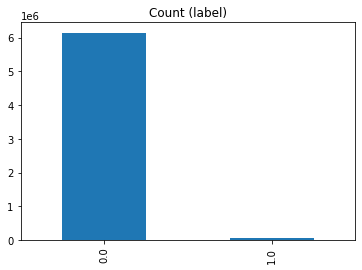

In [53]:
label_count = df_scaled.label.value_counts()
print('Class 0:', label_count[0])
print('Class 1:', label_count[1])
print('Proportion:', round(label_count[0] / label_count[1], 2), ': 1')

label_count.plot(kind='bar', title='Count (label)');

In [54]:
X = df_scaled.drop(['label'], axis = 1)
y = df_scaled['label']

In [55]:
print(X.shape)
print(y.shape)

(6207989, 21)
(6207989,)


## Split data

In [56]:
X_ujung = df_scaled.iloc[:,:-1]
y_ujung = df_scaled.iloc[:,-1]
y_ujung

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6208069    0.0
6208070    0.0
6208071    0.0
6208072    0.0
6208073    0.0
Name: lama_kunjung, Length: 6207989, dtype: float64

In [57]:
#Split train-test data
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0.0: 4301256, 1.0: 44336})


## Undersampling Data

In [58]:
# # # define undersampling strategy

# from imblearn.under_sampling import RandomUnderSampler
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# undersample = RandomUnderSampler(sampling_strategy='majority')

# # fit and apply the transform
# X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# # summarize class distribution
# print("After undersampling: ", Counter(y_train_under))

## Oversampling Data

In [59]:
# define oversampling strategy

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

undersample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))


After undersampling:  Counter({0.0: 4301256, 1.0: 4301256})


# Modelling

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862397 entries, 2694218 to 377236
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   dati2         float64
 1   typefaskes    float64
 2   usia          float64
 3   jenkel        float64
 4   pisat         float64
 5   jenispel      float64
 6   politujuan    float64
 7   diagfktp      float64
 8   biaya         float64
 9   jenispulang   float64
 10  cbg           float64
 11  kelasrawat    float64
 12  kdsa          float64
 13  kdsp          float64
 14  kdsr          float64
 15  kdsi          float64
 16  kdsd          float64
 17  diag          float64
 18  levelid       float64
 19  proc          float64
 20  lama_kunjung  float64
dtypes: float64(21)
memory usage: 312.6 MB


In [61]:
X_test.shape

(1862397, 21)

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier #hasil 0,67
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier #hasil 0,07
from sklearn.tree import DecisionTreeClassifier

model =  RandomForestClassifier()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

tn, fp, fn, tp = confusion_matrix(y_test, pred_under).ravel() 
specificity = tn / (tn+fp)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = 2* ((precision*recall)/(precision+recall))
print('specificity : ',specificity)
print('recall : ',recall)
print('precision : ',precision)
print('accouracy : ',accuracy_score(y_test, pred_under))
print('F1 Score : ', f1_score)
# print(classification_report(y_test, pred_under))

specificity :  0.9972895319086154
recall :  0.6338544990427568
precision :  0.7045991960274296
accouracy :  0.9936200498604755
F1 Score :  0.6673572228443448


In [64]:
# from sklearn.metrics import mean_absolute_error

# # max n_estimators
# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = RandomForestClassifier(n_estimators=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     # mae = mean_absolute_error(val_y, preds_val)
#     tn, fp, fn, tp = confusion_matrix(y_test, preds_val).ravel()
#     recall = tp/(tp+fn)
#     precision = tp/(tp+fp)
#     f1_score = 2* ((precision*recall)/(precision+recall))
#     return(f1_score)

# for max_leaf_nodes in [100, 500, 1000, 5000]:
#     my_mae = get_mae(max_leaf_nodes, X_train_under, X_test, y_train_under, y_test)
#     print("Max leaf nodes: %d  \t\t F1 Score:  %d" %(max_leaf_nodes, my_mae))
#     # print('F1 Score : ', f1_score)

In [65]:
# print(pred_under)
# X_test.index
# results['y_pred'] = y_pred

In [66]:
# len(pred_under)
# df_result =  pd.DataFrame({'id': X_test.index, 'label': pred_under.flatten()})
# df_result =  pd.DataFrame({'label': pred_under.flatten()}, index = X_test.index )
# df_result.index.set_names('id', inplace = True)
# df_result.head()

In [67]:
# X.info(verbose=True, show_counts=True)

In [68]:
# def plot_2d_space(X, y, label='Classes'):
#     colors = ['#1F77B4', '#FF7F0E']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

In [69]:
# from sklearn.decomposition import PCA
#
# pca = PCA(n_components=2)
# X = pca.fit_transform(X)
#
# plot_2d_space(X, y, 'Imbalanced dataset (10 PCA components)')

In [70]:
# # import random undersampling and other necessary libraries 
# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
# #import data
# url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
# df = pd.read_csv(url)

Cell di bawah makan waktu lama untuk RUN, disarankan punya processor yang kuat

In [72]:
# Over-sampling digabung dengan under-sampling dengan SMOTETomek
# Kalo computing power besar, gunakan ini
# from collections import Counter
# from imblearn.combine import SMOTETomek
#
# print('Original dataset shape %s' % Counter(y))
#
# smt = SMOTETomek(random_state=42)
# X_res, y_res = smt.fit_resample(X, y)
#
# print('Resampled dataset shape %s' % Counter(y_res))

#-------------
#Undersampling
# from collections import Counter
# from imblearn.under_sampling import TomekLinks

# print('Original dataset shape %s' % Counter(y))
# tl = TomekLinks()
# X_res, y_res= tl.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))

In [73]:
#todo lakukan split dataset untuk training dan testing

In [74]:
#todo gunakan model yang sesuai dengan klasifikasi

In [75]:
#todo cek akurasinya dengan confusion matrix

# DONE!